In [1]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

from hazma.vector_mediator import VectorMediator, KineticMixing, QuarksOnly
from hazma.scalar_mediator import ScalarMediator

from utilities import get_color, get_tex_label, latex_text_width_1col

In [2]:
# DM masses
mxs = np.logspace(np.log10(50), np.log10(250), 500)
# Mediator masses
mM_light, mM_heavy = [200.0, 1000.0]
mMs = [mM_light, mM_heavy]
# Approximate DM velocity in Milky Way
vx = 1e-3

vms = np.array(
    [
        [KineticMixing(100, mM, gvxx=1.0, eps=1e-1) for mM in mMs],
        [QuarksOnly(100, mM, gvxx=1.0, gvuu=1.0, gvdd=-1.0, gvss=0.0) for mM in mMs],
        [QuarksOnly(100, mM, gvxx=1.0, gvuu=1.0, gvdd=1.0, gvss=0.0) for mM in mMs],
    ]
)

In [7]:
# Get branching fractions for each DM mass
branching_fracts = defaultdict(list)
vm = vms[0, 0]
for mx in mxs:
    vm.mx = mx
    e_cm = 2 * mx * (1 + 0.5 * vx ** 2)
    cur_bfs = vm.annihilation_branching_fractions(e_cm)
    # Unpack this dict
    for (fs, bf) in cur_bfs.items():
        branching_fracts[fs].append(bf)

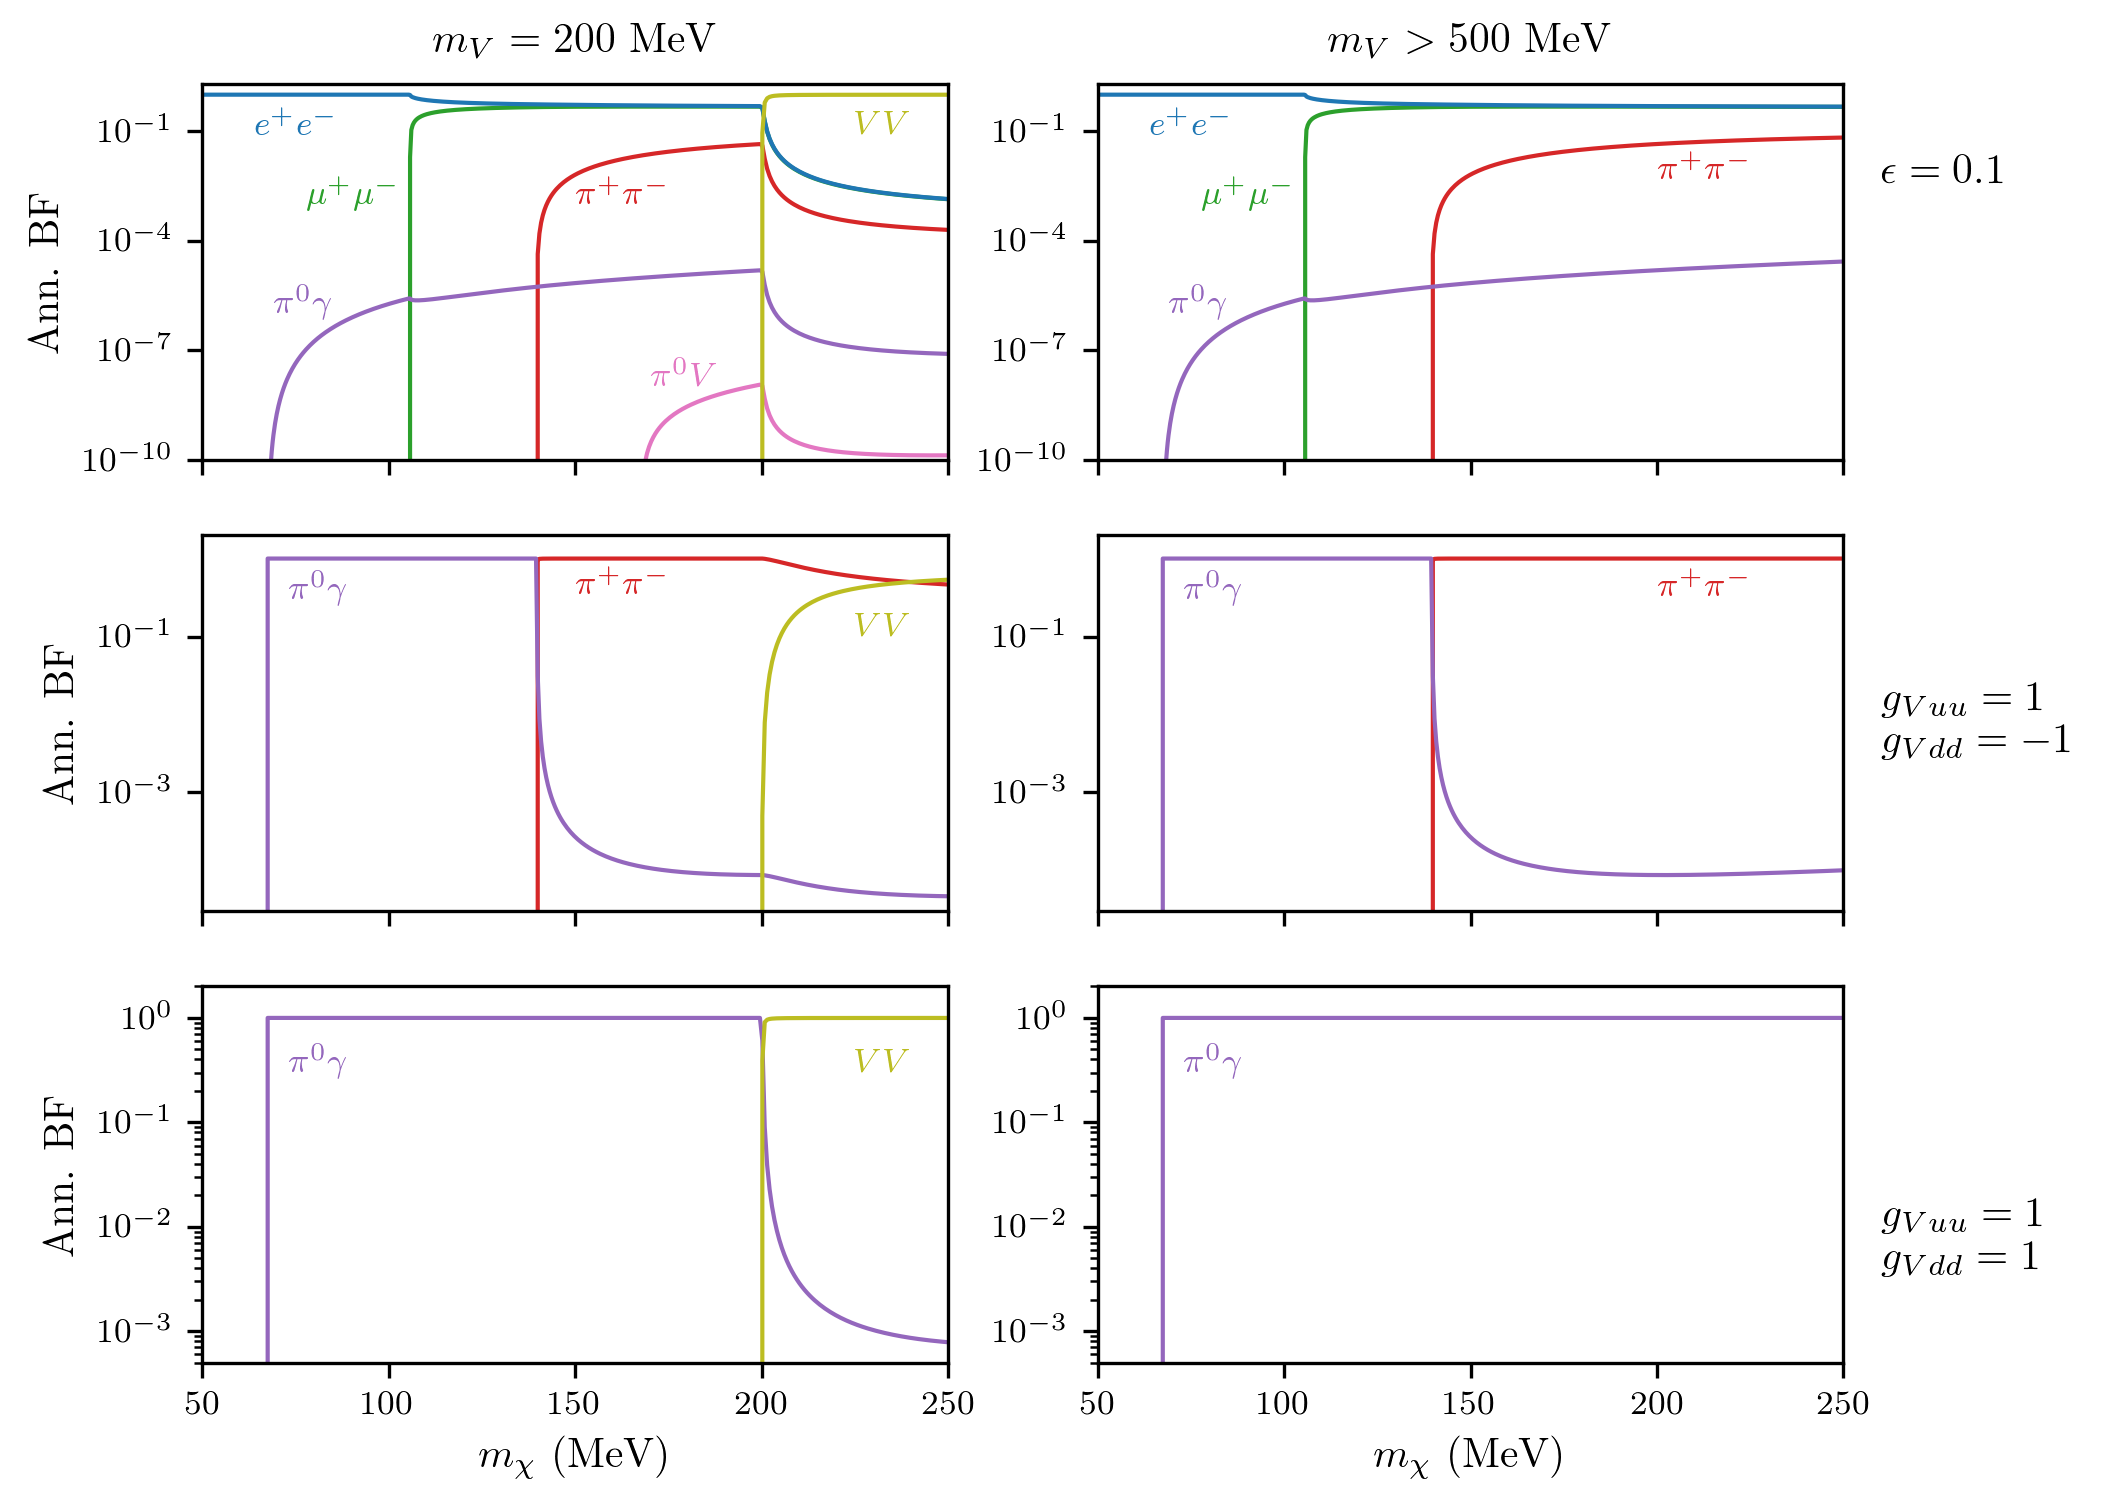

In [34]:
fig, axes = plt.subplots(
    3,
    2,
    sharex=True,
    sharey=False,
    figsize=(latex_text_width_1col, 0.8 * latex_text_width_1col),
)

for row in range(3):
    for col in range(2):
        ax = axes[row, col]
        vm = vms[row, col]  # current model

        # Get branching fractions for each DM mass
        branching_fracts = defaultdict(list)
        for mx in mxs:
            vm.mx = mx
            e_cm = 2 * mx * (1 + 0.5 * vx ** 2)
            cur_bfs = vm.annihilation_branching_fractions(e_cm)
            # Unpack this dict
            for (fs, bf) in cur_bfs.items():
                branching_fracts[fs].append(bf)

        # Plot BFs
        for (fs, bfs) in branching_fracts.items():
            ax.plot(mxs, bfs, label=get_tex_label(fs), color=get_color(fs), linewidth=1)

        # Formatting
        ax.set_yscale("log")
        ax.set_xlim(mxs[[0, -1]])

# Only label outer plots' axes
for col in range(2):
    axes[2, col].set_xlabel(r"$m_\chi$ (MeV)")
for row in range(3):
    axes[row, 0].set_ylabel("Ann. BF")

# Label couplings
axes[0, 1].text(260, 7e-3, r"$\epsilon = 0.1$", va="center", fontsize=10)
axes[1, 1].text(
    260, 7e-3, r"$g_{Vuu} = 1$" + "\n" + r"$g_{Vdd} = -1$", va="center", fontsize=10
)
axes[2, 1].text(
    260, 7e-3, r"$g_{Vuu} = 1$" + "\n" + r"$g_{Vdd} = 1$", va="center", fontsize=10
)

# Label mediator masses
axes[0, 0].set_title(r"$m_V = %i$ MeV" % mM_light, fontsize=10)
axes[0, 1].set_title(r"$m_V > 500$ MeV", fontsize=10)

# Label final states
for col in [0, 1]:
    axes[0, col].text(
        75, 8e-2, r"$e^+ e^-$", color=get_color("e e"), fontsize=8, ha="center"
    )
    axes[0, col].text(78, 1e-3, r"$\mu^+ \mu^-$", color=get_color("mu mu"), fontsize=8)
    axes[0, col].text(69, 1e-6, r"$\pi^0 \gamma$", color=get_color("pi0 g"), fontsize=8)

for row in [1, 2]:
    for col in [0, 1]:
        axes[row, col].text(
            73, 3e-1, r"$\pi^0 \gamma$", color=get_color("pi0 g"), fontsize=8
        )

axes[0, 0].text(170, 1e-8, r"$\pi^0 V$", color=get_color("pi0 v"), fontsize=8)

vv = r"$V V$"
c_vv = get_color("v v")
axes[0, 0].text(225, 8e-2, vv, color=c_vv, fontsize=8)
axes[1, 0].text(225, 1e-1, vv, color=c_vv, fontsize=8)
axes[2, 0].text(225, 3e-1, vv, color=c_vv, fontsize=8)

pipi = r"$\pi^+ \pi^-$"
c_pipi = get_color("pi pi")
axes[0, 0].text(150, 1e-3, pipi, color=c_pipi, fontsize=8)
axes[0, 1].text(200, 5e-3, pipi, color=c_pipi, fontsize=8)
axes[1, 0].text(150, 3.5e-1, pipi, color=c_pipi, fontsize=8)
axes[1, 1].text(200, 3.3e-1, pipi, color=c_pipi, fontsize=8)

for col in range(2):
    axes[0, col].set_ylim(1e-10, 2)
    axes[1, col].set_ylim(3e-5, 2)
    axes[2, col].set_ylim(5e-4, 2)

fig.savefig("figures/vector_ann_bfs.pdf", bbox_inches="tight")